In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [4]:
df.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [5]:
df.shape

(512087, 11)

In [6]:
df['Competition_Metric'].unique()

array([0.007, 0.186, 0.316, 0.099, 0.027, 0.041, 0.012, 0.014, 0.004,
       0.017, 0.054, 0.182, 0.042, 0.013, 0.06 , 0.001, 0.   , 0.129,
       0.029, 0.101, 0.056, 0.003, 0.002, 0.064, 0.237, 0.082, 0.006,
       0.4  , 0.009, 0.087, 0.097, 0.037, 0.049, 0.297, 0.015, 0.021,
       0.263, 0.046, 0.044, 0.295, 0.155, 0.024, 0.141, 0.032, 0.22 ,
       0.193, 0.116, 0.199, 0.005, 0.043, 0.104, 0.059, 0.075, 0.045,
       0.047, 0.768, 0.018, 0.01 , 0.016, 0.068, 0.334, 0.02 , 0.218,
       0.034, 0.419, 0.023, 0.214, 0.112, 0.039, 0.019, 0.035, 0.172,
       0.022, 0.076, 0.166, 0.255, 0.036, 0.051, 0.055, 0.084, 0.267,
       0.074, 0.09 , 0.198, 0.114, 0.008, 0.178, 0.028, 0.038, 0.142,
       0.229, 0.057, 0.061, 0.294, 0.202, 0.213, 0.122, 0.03 , 0.092,
         nan, 0.126, 0.261, 0.509, 0.025, 0.067, 0.149, 0.51 , 0.23 ,
       0.11 , 0.133, 0.053, 0.14 , 0.106, 0.123, 0.117, 0.109, 0.026,
       0.344, 0.121, 0.077, 0.108, 0.111, 0.091, 0.396, 0.171, 0.033,
       0.15 , 0.052,

In [7]:
import seaborn as sns

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

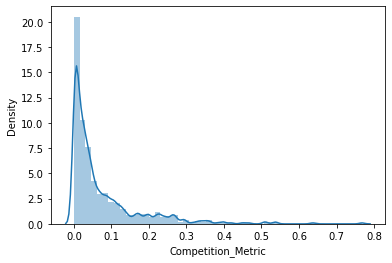

In [8]:
sns.distplot(df['Competition_Metric'])

In [9]:
#since competition is right skewed , we can choose median imputation

In [10]:
df['Competition_Metric'].fillna(df['Competition_Metric'].median(),inplace=True)

In [11]:
df.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64

In [12]:
df1 = df.copy()

In [13]:
df1 = df1.drop(['ID','Course_ID','Day_No'],1)

C:\Users\prath\AppData\Local\Temp/ipykernel_5208/3382573284.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1 = df1.drop(['ID','Course_ID','Day_No'],1)


In [14]:
df1.head()

,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,Development,Course,0,1,1,11004,0.007,81
1,Development,Course,0,0,1,13650,0.007,79
2,Development,Course,0,0,1,11655,0.007,75
3,Development,Course,0,0,1,12054,0.007,80
4,Development,Course,0,0,1,6804,0.007,41


In [15]:
for i in df1.columns:
    print(df1[i].value_counts())
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
0    317369
1    194718
Name: Short_Promotion, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
0    495885
1     16202
Name: Public_Holiday, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
0    261693
1    250394
Name: Long_Promotion, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
10857    1410
11193    1406
10647    1400
11760    1397
11655    1377
         ... 
651         1
672         1
58128       1
55923       1
69258       1
Name: User_Traffic, Length: 3475, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
0.001    20800
0.003    18852
0.002    16390
0.004    15838
0.009    11980
         ...  
0.166      698
0.096      698

In [16]:
df_num = df1[['User_Traffic','Competition_Metric','Sales']]

In [17]:
import matplotlib.pyplot as plt

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


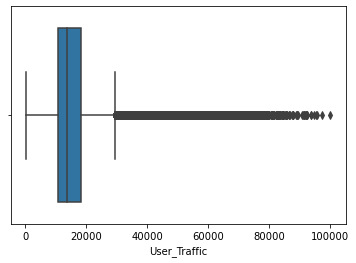

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


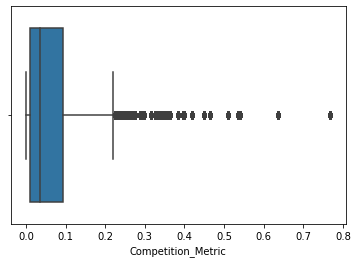

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


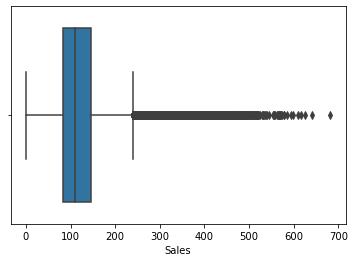

In [18]:
for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

In [19]:
df1.columns

Index(['Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales'],
      dtype='object')

In [20]:
df_cat = df1[['Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday','Long_Promotion']]

In [21]:
df_num.columns

Index(['User_Traffic', 'Competition_Metric', 'Sales'], dtype='object')

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


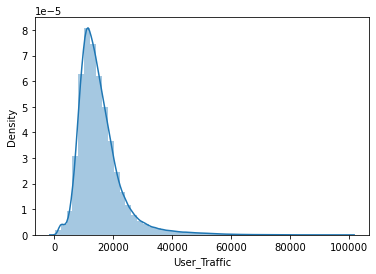

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


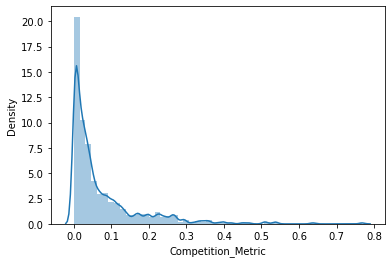

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


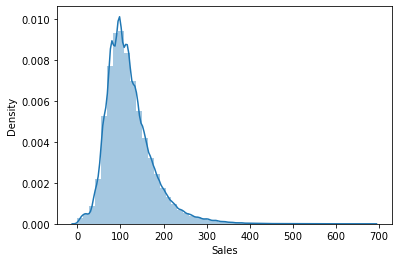

In [22]:
for i in df_num.columns:
    sns.distplot(df[i])
    plt.show()

In [23]:
#User traffic,sales ,competition are right skewed

In [24]:
df_num.skew()

User_Traffic          2.307822
Competition_Metric    2.584232
Sales                 1.374770
dtype: float64

In [25]:
#user traffic and competition metric are more right skewed when compared to Sales columns

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


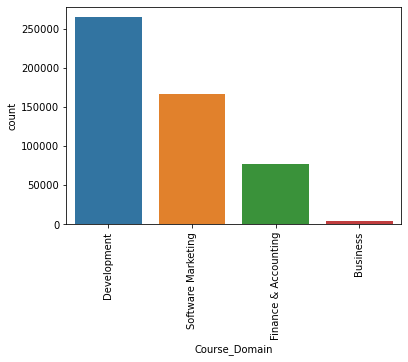

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


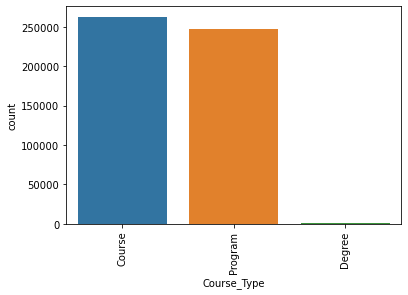

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


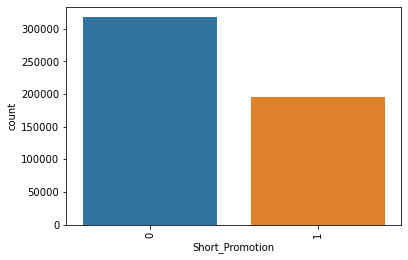

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


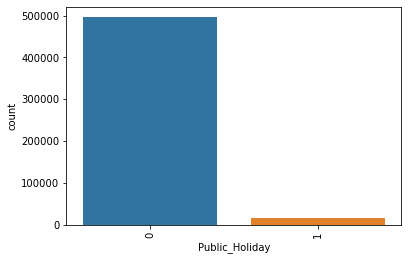

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


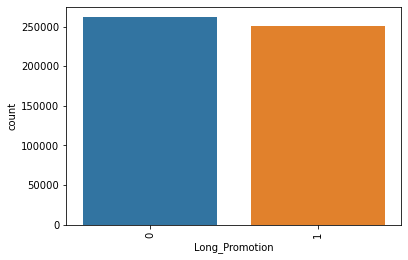

In [26]:
for i in df_cat.columns:
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

## target(cont) vs cont

In [27]:
#target - numerical
#numerical columns

In [28]:
#num vs num

In [29]:
df_num.columns

Index(['User_Traffic', 'Competition_Metric', 'Sales'], dtype='object')

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User_Traffic', ylabel='Sales'>

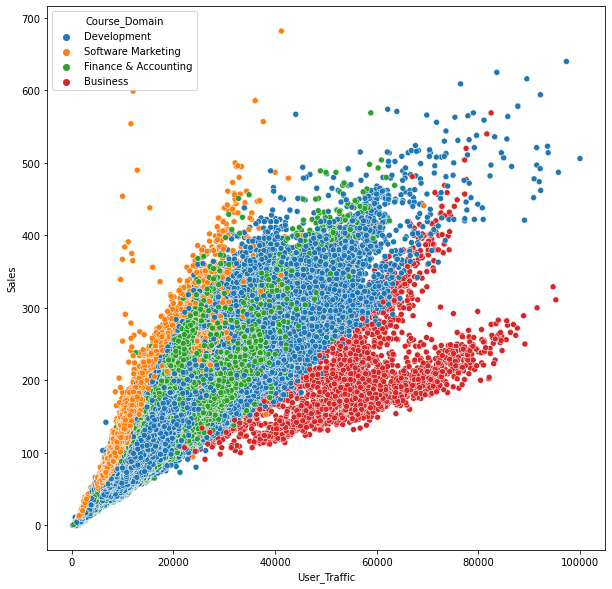

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_num['User_Traffic'],df_num['Sales'],hue=df_cat['Course_Domain'])

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Competition_Metric', ylabel='Sales'>

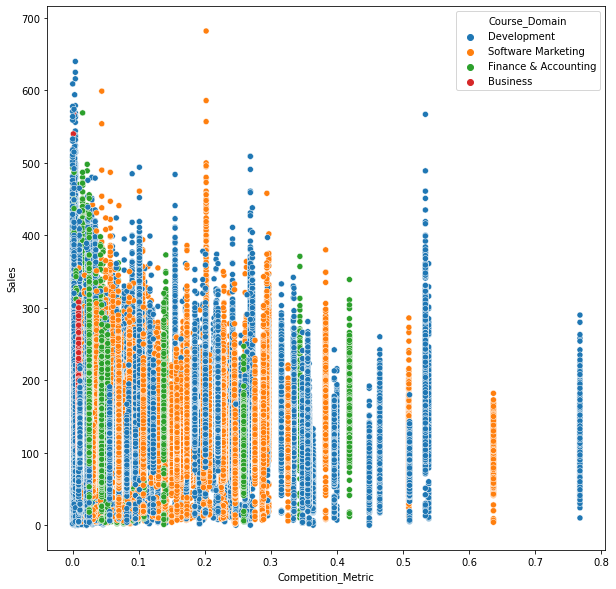

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_num['Competition_Metric'],df_num['Sales'],hue=df_cat['Course_Domain'])

<AxesSubplot:>

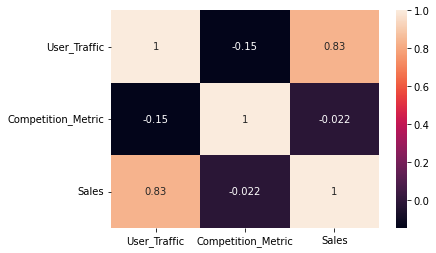

In [32]:
sns.heatmap(df_num.corr(),annot=True)

In [33]:
for i in df_cat.columns:
    print(df_cat[i].value_counts())
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
0    317369
1    194718
Name: Short_Promotion, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
0    495885
1     16202
Name: Public_Holiday, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
0    261693
1    250394
Name: Long_Promotion, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


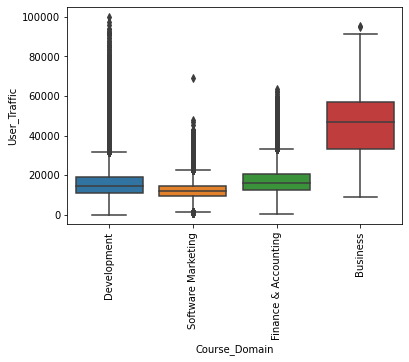

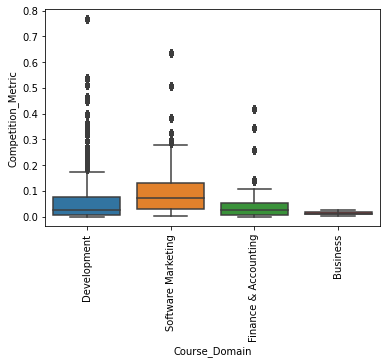

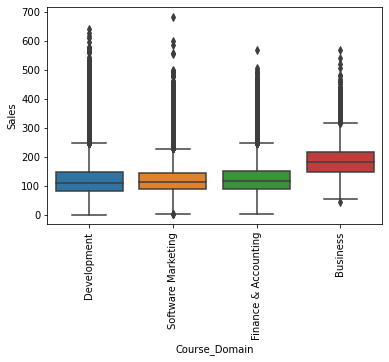

In [34]:
for c in df_num:
    sns.boxplot(x='Course_Domain',y = c,data=df)
    plt.xticks(rotation=90)
    plt.show()

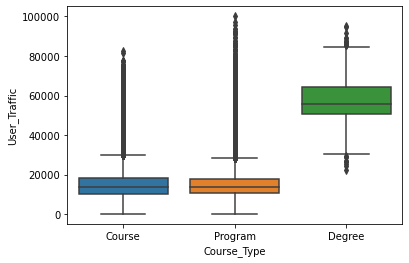

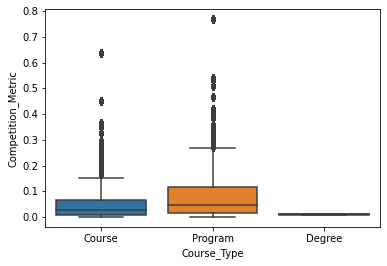

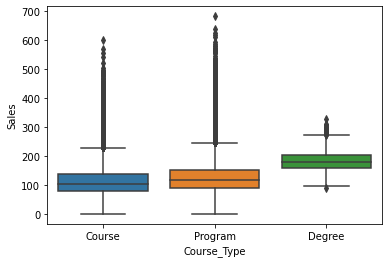

In [35]:
for c in df_num:
    sns.boxplot(x='Course_Type',y = c,data=df)
    plt.show()

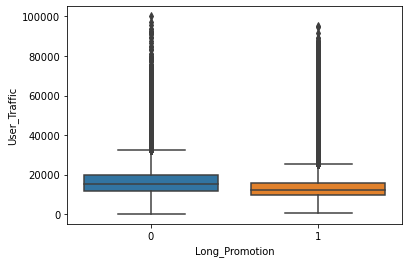

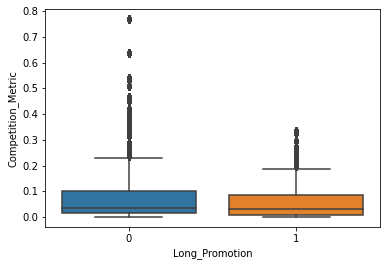

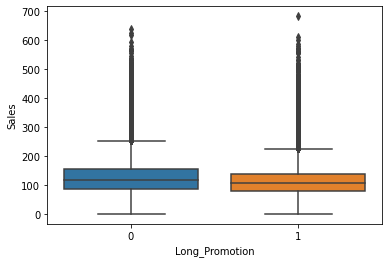

In [36]:
for c in df_num:
    sns.boxplot(x='Long_Promotion',y = c,data=df)
    plt.show()

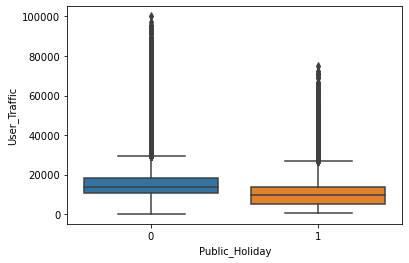

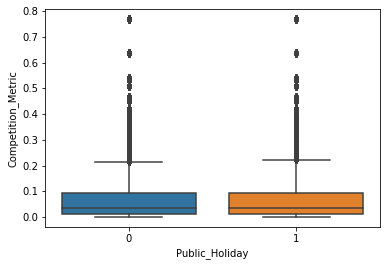

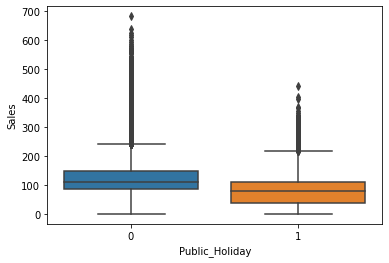

In [37]:
for c in df_num:
    sns.boxplot(x='Public_Holiday',y = c,data=df)
    plt.show()

In [38]:
df_cat_encode = pd.get_dummies(df_cat,drop_first=True)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
SS = StandardScaler()

In [41]:
df_num_num = df_num.drop('Sales',1)

C:\Users\prath\AppData\Local\Temp/ipykernel_5208/3319584716.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num_num = df_num.drop('Sales',1)


In [42]:
df_num_scale = SS.fit_transform(df_num_num)

In [43]:
df_num_scale_df = pd.DataFrame(df_num_scale)

In [44]:
df_num_scale_df

,0,1
0,-0.565676,-0.662342
1,-0.223250,-0.662342
2,-0.481428,-0.662342
3,-0.429792,-0.662342
4,-1.109208,-0.662342
...,...,...
512082,-0.837442,-0.032140
512083,-0.625464,-0.032140
512084,-0.220532,-0.032140
512085,-0.837442,-0.032140


In [45]:
df_cat_encode

,Short_Promotion,Public_Holiday,Long_Promotion,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,0,1,1,1,0,0,0,0
1,0,0,1,1,0,0,0,0
2,0,0,1,1,0,0,0,0
3,0,0,1,1,0,0,0,0
4,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
512082,0,0,1,0,0,1,0,1
512083,0,0,1,0,0,1,0,1
512084,0,0,1,0,0,1,0,1
512085,0,0,1,0,0,1,0,1


In [46]:
df_num

,User_Traffic,Competition_Metric,Sales
0,11004,0.007,81
1,13650,0.007,79
2,11655,0.007,75
3,12054,0.007,80
4,6804,0.007,41
...,...,...,...
512082,8904,0.070,114
512083,10542,0.070,145
512084,13671,0.070,167
512085,8904,0.070,107


In [47]:
final = pd.concat([df_num_scale_df,df_cat_encode,df_num['Sales']],1)

C:\Users\prath\AppData\Local\Temp/ipykernel_5208/2583489727.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  final = pd.concat([df_num_scale_df,df_cat_encode,df_num['Sales']],1)


In [48]:
final

,0,1,Short_Promotion,Public_Holiday,Long_Promotion,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,Sales
0,-0.565676,-0.662342,0,1,1,1,0,0,0,0,81
1,-0.223250,-0.662342,0,0,1,1,0,0,0,0,79
2,-0.481428,-0.662342,0,0,1,1,0,0,0,0,75
3,-0.429792,-0.662342,0,0,1,1,0,0,0,0,80
4,-1.109208,-0.662342,0,0,1,1,0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...
512082,-0.837442,-0.032140,0,0,1,0,0,1,0,1,114
512083,-0.625464,-0.032140,0,0,1,0,0,1,0,1,145
512084,-0.220532,-0.032140,0,0,1,0,0,1,0,1,167
512085,-0.837442,-0.032140,0,0,1,0,0,1,0,1,107


# Splitting the data 

In [49]:
x = final.drop('Sales',1)
y = final['Sales']

C:\Users\prath\AppData\Local\Temp/ipykernel_5208/3909447267.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = final.drop('Sales',1)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1999)

# Model Training

Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
LR =LinearRegression()

In [54]:
LR.fit(xtrain,ytrain)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [55]:
LR_y_pred = LR.predict(xtest)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [57]:
mean_squared_error(ytest,LR_y_pred)

498.2407994744596

In [58]:
import numpy as np

In [59]:
LR_rmse = np.sqrt(mean_squared_error(ytest,LR_y_pred))

In [60]:
LR_rmse

22.321308193617586

Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
DT = DecisionTreeRegressor()

In [63]:
DT.fit(xtrain,ytrain)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeRegressor()

In [64]:
DT_y_pred = DT.predict(xtest)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [65]:
mean_squared_error(ytest,DT_y_pred)

200.303916453768

In [66]:
DT_rmse = np.sqrt(mean_squared_error(ytest,DT_y_pred))

In [67]:
DT_rmse

14.152876614093971

Ridge

In [68]:
from sklearn.linear_model import Ridge

In [69]:
Ridge=Ridge(alpha=1)

In [70]:
Ridge.fit(xtrain,ytrain)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Ridge(alpha=1)

In [71]:
Ridge_y_pred=Ridge.predict(xtest)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [72]:
mean_squared_error(ytest,Ridge_y_pred)

498.24002364399496

In [73]:
Ridge_rmse = np.sqrt(mean_squared_error(ytest,Ridge_y_pred))

In [74]:
Ridge_rmse

22.32129081491469

Lasso

In [75]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.5)
Lasso.fit(xtrain,ytrain)
Lasso_y_pred=Lasso.predict(xtest)
mean_squared_error(ytest,Lasso_y_pred)
Lasso_rmse = np.sqrt(mean_squared_error(ytest,Lasso_y_pred))
Lasso_rmse

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


24.80081567947431

OLS METHOD

In [76]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [77]:
import statsmodels.api as sm
x = final.drop('Sales',1)
y = final['Sales']

xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()

model.summary()

C:\Users\prath\AppData\Local\Temp/ipykernel_5208/3914118181.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = final.drop('Sales',1)
C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 2.490e+05
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:26:02   Log-Likelihood:            -2.3199e+06
No. Observations:              512087   AIC:                         4.640e+06
Df Residuals:                  512076   BIC:                         4.640e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 36.5897      0.450     81.380      0.000      35.708      37.471
0                                     51.7761      0.038   1374.972      0.000      51.702      51.850
1                                      4.2726      0.033    130.066      0.000       4.208       4.337
Short_Promotion                       19.9330      0.066    300.160      0.000      19.803      20.063
Public_Holiday                        -9.2111      0.181    -51.003      0.000      -9.565      -8.857
Long_Promotion                         6.8355      0.066    103.958      0.000       6.707       6.964
Course_Domain_Development             65.6768      0.451    145.617      0.000      64.793      66.561
Course_Domain_Finance & Accounting    63.6899      0.456    139.820      0.000      62.797      64.583
Course_Domain_Software Marketing      86.2962      0.458    188.413      0.000      85.398      87.194
Course_Type_Degree                  -141.9147      0.698   -203.441      0.000    -143.282    -140.548
Course_Type_Program                    5.3637      0.065     82.092      0.000       5.236       5.492
==============================================================================
Omnibus:                    88821.630   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456098.333
Skew:                           0.749   Prob(JB):                         0.00
Kurtosis:                       7.374   Cond. No.                         47.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif=pd.DataFrame([vif(xc.values,i) for i in range(xc.shape[1])],index=xc.columns,columns=['vif'])
vif

,vif
const,205.406610
0,1.440803
1,1.096435
Short_Promotion,1.055978
Public_Holiday,1.015392
Long_Promotion,1.097699
Course_Domain_Development,51.620332
Course_Domain_Finance & Accounting,26.995221
Course_Domain_Software Marketing,46.723330
Course_Type_Degree,1.697337


In [79]:
pip install mlxtend

In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings('ignore')

In [81]:
lir = LinearRegression()
sfs1 = sfs(lir,k_features=5,forward=True,scoring='neg_root_mean_squared_error',cv=3,verbose=2)
sfs1.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished

[2022-12-29 12:26:07] Features: 1/5 -- score: -30.649284129058756[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s finished

[2022-12-29 12:26:08] Features: 2/5 -- score: -28.544425806338083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s finished

[2022-12-29 12:26:09] Features: 3/5 -- score: -26.536313834735676[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), k_features=5,
                          scoring='neg_root_mean_squared_error', verbose=2)

In [82]:
print('Feature selection using forward are:\n',sfs1.k_feature_names_)
print('\nR_squared',sfs1.k_score_)

Feature selection using forward are:
 (0, 'Short_Promotion', 'Course_Domain_Software Marketing', 'Course_Type_Degree', 'Course_Type_Program')

R_squared -25.859309217449578
